<h1 >Ingénierie des Connaissances TD1</h1>


<h3 >Exercice 1 : </h3>


C:\Users\HP\AppData\Local\Temp\ipykernel_15588\2895733304.py:80: UserWarning: Glyph 128309 (\N{LARGE BLUE CIRCLE}) missing from current font.
  plt.tight_layout()


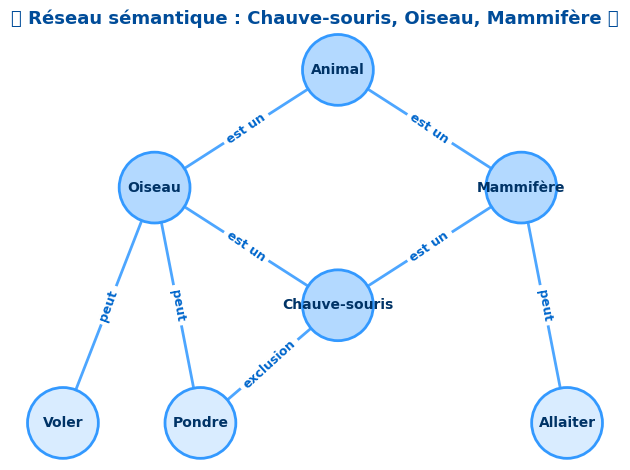

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

noeuds = ["Animal", "Oiseau", "Mammifère",
          "Chauve-souris", "Voler", "Pondre", "Allaiter"]
G.add_nodes_from(noeuds)

G.add_edge("Oiseau", "Animal", relation="est un")
G.add_edge("Mammifère", "Animal", relation="est un")
G.add_edge("Chauve-souris", "Oiseau", relation="est un")
G.add_edge("Chauve-souris", "Mammifère", relation="est un")

G.add_edge("Oiseau", "Voler", relation="peut")
G.add_edge("Oiseau", "Pondre", relation="peut")
G.add_edge("Mammifère", "Allaiter", relation="peut")

G.add_edge("Chauve-souris", "Pondre", relation="exclusion")

pos = {
    "Animal": (0, 3),
    "Oiseau": (-2, 2),
    "Mammifère": (2, 2),
    "Chauve-souris": (0, 1),
    "Voler": (-3, 0),
    "Pondre": (-1.5, 0),
    "Allaiter": (2.5, 0)
}

# 🎨 Palette BLEUE
couleurs = []
for n in G.nodes():
    if n in ["Animal", "Oiseau", "Mammifère", "Chauve-souris"]:
        couleurs.append("#b3d9ff")   # bleu pastel (concepts)
    else:
        couleurs.append("#d9ecff")   # bleu très clair (propriétés)

nx.draw_networkx_nodes(
    G, pos,
    node_color=couleurs,
    node_size=2600,
    edgecolors="#3399ff",  # contour bleu
    linewidths=2
)

nx.draw_networkx_labels(
    G, pos,
    font_size=10,
    font_weight="bold",
    font_color="#003366"
)

nx.draw_networkx_edges(
    G, pos,
    arrows=True,
    arrowstyle='-|>',
    arrowsize=20,
    width=2,
    edge_color="#4da6ff"
)

edge_labels = nx.get_edge_attributes(G, 'relation')
nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels=edge_labels,
    font_color="#0066cc",
    font_size=9,
    font_weight="bold"
)

plt.title(
    "🔵 Réseau sémantique : Chauve-souris, Oiseau, Mammifère 🔵",
    fontsize=13,
    fontweight="bold",
    color="#004c99"
)

plt.axis("off")
plt.tight_layout()
plt.show()


<h3 >Exercice 2 </h3>


C:\Users\HP\AppData\Local\Temp\ipykernel_15588\3185040470.py:84: UserWarning: Glyph 128309 (\N{LARGE BLUE CIRCLE}) missing from current font.
  plt.tight_layout()


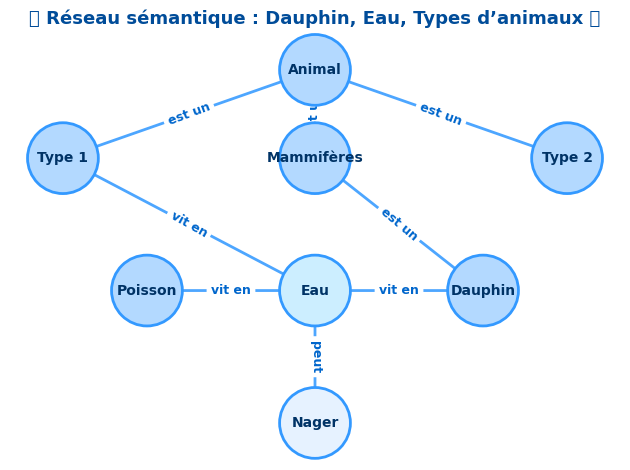

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

noeuds = [
    "Animal", "Type 1", "Type 2", "Mammifères",
    "Poisson", "Eau", "Dauphin", "Nager"
]
G.add_nodes_from(noeuds)

G.add_edge("Type 1", "Animal", relation="est un")
G.add_edge("Type 2", "Animal", relation="est un")
G.add_edge("Mammifères", "Animal", relation="est un")

G.add_edge("Type 1", "Eau", relation="vit en")         
G.add_edge("Poisson", "Eau", relation="vit en")
G.add_edge("Dauphin", "Eau", relation="vit en")

G.add_edge("Dauphin", "Mammifères", relation="est un")
G.add_edge("Eau", "Nager", relation="peut")

pos = {
    "Animal": (0, 4),
    "Type 1": (-3, 3),
    "Type 2": (3, 3),
    "Mammifères": (0, 3),
    "Eau": (0, 1.5),
    "Poisson": (-2, 1.5),
    "Dauphin": (2, 1.5),
    "Nager": (0, 0)
}

# 🎨 Palette BLEUE
couleurs = []
for n in G.nodes():
    if n in ["Animal", "Type 1", "Type 2", "Mammifères", "Poisson", "Dauphin"]:
        couleurs.append("#b3d9ff")   # bleu pastel (concepts)
    elif n == "Eau":
        couleurs.append("#cceeff")   # bleu très clair (environnement)
    else:
        couleurs.append("#e6f2ff")   # bleu ultra clair (action)

nx.draw_networkx_nodes(
    G, pos,
    node_color=couleurs,
    node_size=2600,
    edgecolors="#3399ff",    # contour bleu
    linewidths=2
)

nx.draw_networkx_labels(
    G, pos,
    font_size=10,
    font_weight='bold',
    font_color="#003366"
)

nx.draw_networkx_edges(
    G, pos,
    arrowstyle='-|>',
    arrowsize=20,
    width=2,
    edge_color="#4da6ff"
)

edge_labels = nx.get_edge_attributes(G, 'relation')
nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels=edge_labels,
    font_color="#0066cc",
    font_size=9,
    font_weight="bold"
)

plt.title(
    "🔵 Réseau sémantique : Dauphin, Eau, Types d’animaux 🔵",
    fontsize=13,
    fontweight='bold',
    color="#004c99"
)

plt.axis('off')
plt.tight_layout()
plt.show()


Le dauphin hérite du mammifère, qui est un animal.

Le poisson vit dans l’eau → cette propriété permet la propagation vers le nœud “Peut nager”.

Le dauphin, vivant aussi dans l’eau, hérite indirectement de la propriété “Peut nager”.

---> Conclusion : Les dauphins peuvent nager

<h3 >Exercice 3 </h3>


C:\Users\HP\AppData\Local\Temp\ipykernel_15588\353489350.py:83: UserWarning: Glyph 128309 (\N{LARGE BLUE CIRCLE}) missing from current font.
  plt.tight_layout()


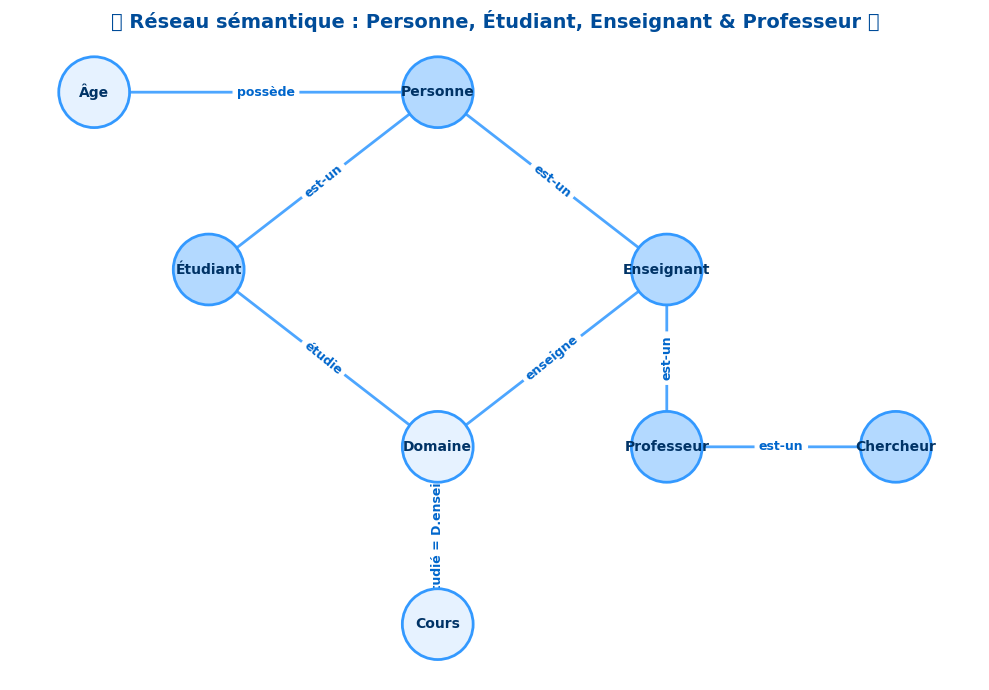

In [9]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

categories = ["Personne", "Étudiant", "Enseignant", "Professeur", "Chercheur"]
proprietes = ["Domaine", "Cours", "Âge"]

G.add_nodes_from(categories + proprietes)

G.add_edge("Étudiant", "Personne", relation="est-un")
G.add_edge("Enseignant", "Personne", relation="est-un")
G.add_edge("Professeur", "Enseignant", relation="est-un")
G.add_edge("Professeur", "Chercheur", relation="est-un")

G.add_edge("Personne", "Âge", relation="possède")
G.add_edge("Étudiant", "Domaine", relation="étudie")
G.add_edge("Enseignant", "Domaine", relation="enseigne")
G.add_edge("Cours", "Domaine", relation="D.étudié = D.enseigné")

pos = {
    "Personne": (0, 3),
    "Étudiant": (-2, 2),
    "Enseignant": (2, 2),
    "Professeur": (2, 1),
    "Chercheur": (4, 1),
    "Domaine": (0, 1),
    "Cours": (0, 0),
    "Âge": (-3, 3)
}

# 🎨 Palette BLEUE
node_colors = []
for node in G.nodes():
    if node in categories:
        node_colors.append("#b3d9ff")   # bleu pastel (catégories)
    else:
        node_colors.append("#e6f2ff")   # bleu très clair (propriétés)

plt.figure(figsize=(10, 7))

nx.draw_networkx_nodes(
    G, pos,
    node_color=node_colors,
    node_size=2600,
    edgecolors="#3399ff",   # contour bleu
    linewidths=2
)

nx.draw_networkx_edges(
    G, pos,
    arrowstyle='-|>',
    arrowsize=25,
    width=2,
    edge_color="#4da6ff"
)

nx.draw_networkx_labels(
    G, pos,
    font_size=10,
    font_weight='bold',
    font_color="#003366"
)

edge_labels = nx.get_edge_attributes(G, 'relation')

nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels=edge_labels,
    font_color="#0066cc",
    font_size=9,
    font_weight='bold'
)

plt.title(
    "🔵 Réseau sémantique : Personne, Étudiant, Enseignant & Professeur 🔵",
    fontsize=14,
    fontweight='bold',
    color="#004c99"
)

plt.axis('off')
plt.tight_layout()
plt.show()


La contrainte « le domaine enseigné doit être identique au domaine étudié pour un même cours » correspond à une contrainte d’égalité, également appelée contrainte d’intégrité au sein du réseau sémantique.

Elle impose une correspondance parfaite entre les propriétés associées au même cours.

Elle appartient à la catégorie des contraintes de cohérence, car elle garantit l’harmonisation des informations liées au cours.

<h3 style="color:#0078B8;">Exercice 4 </h3>


C:\Users\HP\AppData\Local\Temp\ipykernel_15588\4182296161.py:99: UserWarning: Glyph 128309 (\N{LARGE BLUE CIRCLE}) missing from current font.
  plt.tight_layout()


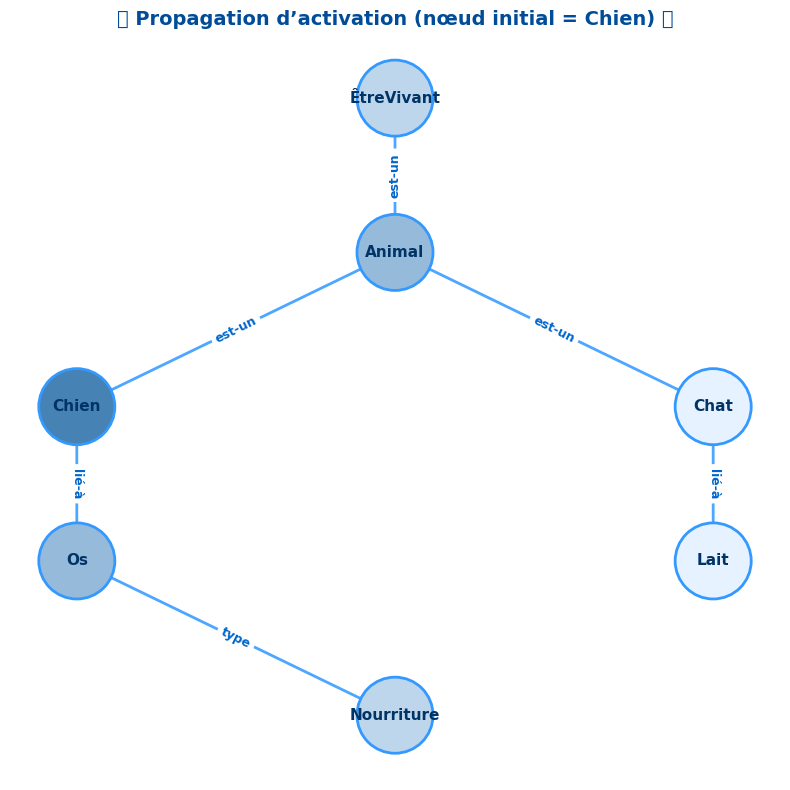

Niveau d'activation après propagation :
Chien        → activation = 1.000
Animal       → activation = 0.500
Os           → activation = 0.500
ÊtreVivant   → activation = 0.250
Nourriture   → activation = 0.250


In [10]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

nodes = ["ÊtreVivant", "Animal", "Chien", "Chat", "Os", "Lait", "Nourriture"]
G.add_nodes_from(nodes)

G.add_edge("Chien", "Animal", relation="est-un")
G.add_edge("Chat", "Animal", relation="est-un")
G.add_edge("Animal", "ÊtreVivant", relation="est-un")
G.add_edge("Chien", "Os", relation="lié-à")
G.add_edge("Chat", "Lait", relation="lié-à")
G.add_edge("Os", "Nourriture", relation="type")

pos = {
    "ÊtreVivant": (0, 4),
    "Animal": (0, 3),
    "Chien": (-2, 2),
    "Chat": (2, 2),
    "Os": (-2, 1),
    "Lait": (2, 1),
    "Nourriture": (0, 0)
}

# ---------------------------
# 🔵 Propagation d’activation
# ---------------------------
activation = {"Chien": 1.0}
facteur = 0.5
niveau = 3

for _ in range(niveau):
    new_activation = activation.copy()
    for node, value in activation.items():
        for neighbor in G.successors(node):
            propagated = value * facteur
            if neighbor not in new_activation or propagated > new_activation[neighbor]:
                new_activation[neighbor] = propagated
    activation = new_activation

max_act = max(activation.values())

# 🎨 Dégradé BLEU selon activation
colors = []
for node in G.nodes():
    val = activation.get(node, 0)
    intensity = val / max_act if max_act else 0

    # bleu très clair → bleu foncé
    r = (1 - intensity) * (230/255) + intensity * (70/255)
    g = (1 - intensity) * (242/255) + intensity * (130/255)
    b = (1 - intensity) * (255/255) + intensity * (180/255)

    colors.append((r, g, b))

plt.figure(figsize=(8, 8))

nx.draw_networkx_nodes(
    G, pos,
    node_color=colors,
    node_size=3000,
    edgecolors="#3399ff",   # contour bleu
    linewidths=2
)

nx.draw_networkx_edges(
    G, pos,
    arrowstyle='-|>',
    arrowsize=25,
    width=2,
    edge_color="#4da6ff"
)

nx.draw_networkx_labels(
    G, pos,
    font_size=11,
    font_weight='bold',
    font_color="#003366"
)

edge_labels = nx.get_edge_attributes(G, "relation")
nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels=edge_labels,
    font_color="#0066cc",
    font_size=9,
    font_weight="bold"
)

plt.title(
    "🔵 Propagation d’activation (nœud initial = Chien) 🔵",
    fontsize=14,
    fontweight='bold',
    color="#004c99"
)

plt.axis('off')
plt.tight_layout()
plt.show()

print("Niveau d'activation après propagation :")
for node, val in activation.items():
    print(f"{node:<12} → activation = {val:.3f}")


<h3 >Exercice 5 </h3>


C:\Users\HP\AppData\Local\Temp\ipykernel_15588\3507427327.py:83: UserWarning: Glyph 128309 (\N{LARGE BLUE CIRCLE}) missing from current font.
  plt.tight_layout()


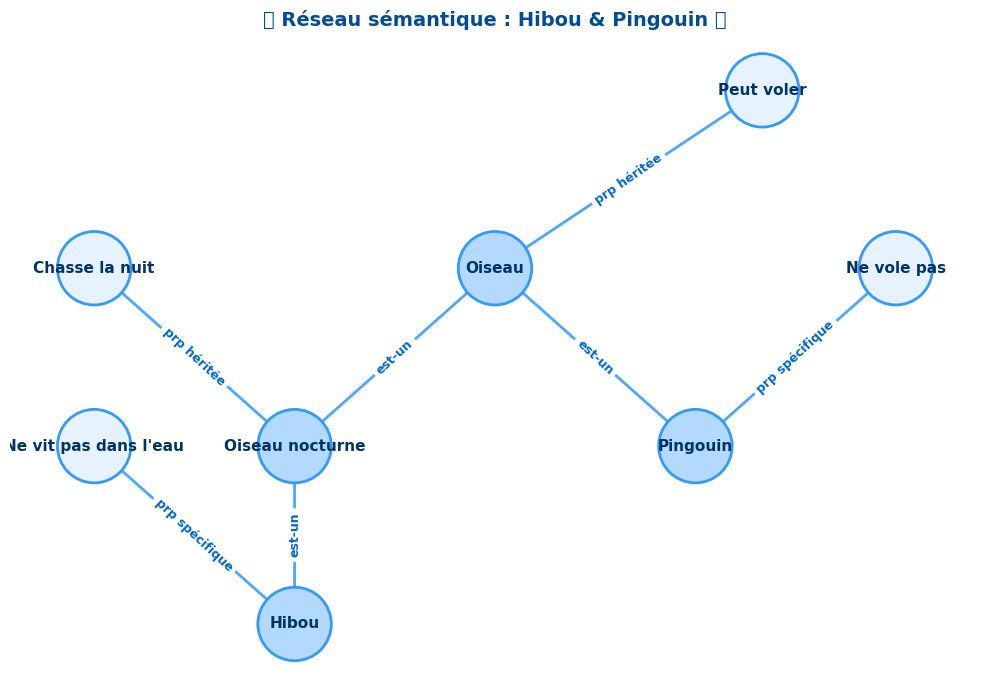

In [11]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

nodes = [
    "Oiseau", "Oiseau nocturne", "Pingouin", "Hibou",
    "Peut voler", "Ne vole pas", "Chasse la nuit", "Ne vit pas dans l'eau"
]
G.add_nodes_from(nodes)

G.add_edge("Oiseau nocturne", "Oiseau", relation="est-un")
G.add_edge("Hibou", "Oiseau nocturne", relation="est-un")
G.add_edge("Pingouin", "Oiseau", relation="est-un")

G.add_edge("Oiseau", "Peut voler", relation="prp héritée")
G.add_edge("Oiseau nocturne", "Chasse la nuit", relation="prp héritée")
G.add_edge("Pingouin", "Ne vole pas", relation="prp spécifique")
G.add_edge("Hibou", "Ne vit pas dans l'eau", relation="prp spécifique")

pos = {
    "Oiseau": (0, 3),
    "Oiseau nocturne": (-1.5, 2),
    "Pingouin": (1.5, 2),
    "Hibou": (-1.5, 1),
    "Peut voler": (2, 4),
    "Ne vole pas": (3, 3),
    "Chasse la nuit": (-3, 3),
    "Ne vit pas dans l'eau": (-3, 2)
}

# 🎨 Palette BLEUE
node_colors = []
for node in G.nodes():
    if node in ["Oiseau", "Oiseau nocturne", "Pingouin", "Hibou"]:
        node_colors.append("#b3d9ff")   # bleu pastel (concepts)
    else:
        node_colors.append("#e6f2ff")   # bleu très clair (propriétés)

plt.figure(figsize=(10, 7))

nx.draw_networkx_nodes(
    G, pos,
    node_color=node_colors,
    node_size=2800,
    edgecolors="#3399ff",   # contour bleu
    linewidths=2
)

nx.draw_networkx_edges(
    G, pos,
    arrowstyle='-|>',
    arrowsize=25,
    width=2,
    edge_color="#4da6ff"
)

nx.draw_networkx_labels(
    G, pos,
    font_size=11,
    font_weight='bold',
    font_color="#003366"
)

edge_labels = nx.get_edge_attributes(G, 'relation')

nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels=edge_labels,
    font_color="#0066cc",
    font_size=9,
    font_weight='bold'
)

plt.title(
    "🔵 Réseau sémantique : Hibou & Pingouin 🔵",
    fontsize=14,
    fontweight='bold',
    color="#004c99"
)

plt.axis('off')
plt.tight_layout()
plt.show()


<h3 >Exercice 6 </h3>


C:\Users\HP\AppData\Local\Temp\ipykernel_15588\2166147555.py:86: UserWarning: Glyph 128309 (\N{LARGE BLUE CIRCLE}) missing from current font.
  plt.tight_layout()


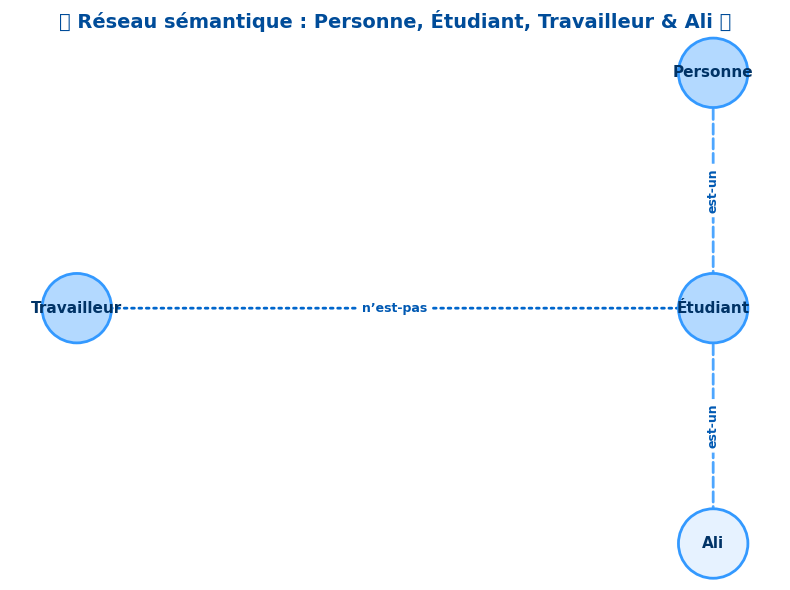

In [12]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

nodes = ["Personne", "Étudiant", "Travailleur", "Ali"]
G.add_nodes_from(nodes)

G.add_edge("Étudiant", "Personne", relation="est-un")
G.add_edge("Étudiant", "Travailleur", relation="n’est-pas")
G.add_edge("Ali", "Étudiant", relation="est-un")

pos = {
    "Personne": (0, 3),
    "Étudiant": (0, 2),
    "Travailleur": (-2, 2),
    "Ali": (0, 1)
}

# 🎨 Palette BLEUE
node_colors = []
for node in G.nodes():
    if node == "Ali":
        node_colors.append("#e6f2ff")   # bleu très clair (individu)
    else:
        node_colors.append("#b3d9ff")   # bleu pastel (concepts)

plt.figure(figsize=(8, 6))

nx.draw_networkx_nodes(
    G, pos,
    node_color=node_colors,
    node_size=2500,
    edgecolors="#3399ff",   # contour bleu
    linewidths=2
)

nx.draw_networkx_labels(
    G, pos,
    font_size=11,
    font_weight='bold',
    font_color="#003366"    # bleu foncé
)

# 🎯 Styles des relations conservés
for u, v, data in G.edges(data=True):
    relation = data['relation']

    if relation == "sorte-de":
        style = "solid"
        color = "#4da6ff"
    elif relation == "n’est-pas":
        style = "dotted"
        color = "#0066cc"    # plus foncé pour la négation
    else:  # "est-un"
        style = "dashed"
        color = "#4da6ff"

    nx.draw_networkx_edges(
        G, pos,
        edgelist=[(u, v)],
        style=style,
        width=2,
        arrowstyle='-|>',
        arrowsize=25,
        edge_color=color
    )

edge_labels = nx.get_edge_attributes(G, "relation")
nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels=edge_labels,
    font_color="#0059b3",
    font_size=9,
    font_weight="bold"
)

plt.title(
    "🔵 Réseau sémantique : Personne, Étudiant, Travailleur & Ali 🔵",
    fontsize=14,
    fontweight='bold',
    color="#004c99"
)

plt.axis('off')
plt.tight_layout()
plt.show()


<h3 >Exercice 7 </h3>


C:\Users\HP\AppData\Local\Temp\ipykernel_15588\1699414951.py:98: UserWarning: Glyph 128309 (\N{LARGE BLUE CIRCLE}) missing from current font.
  plt.tight_layout()


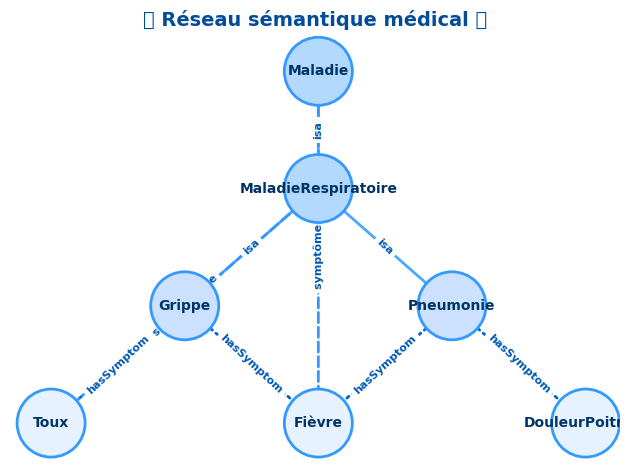

In [13]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

nodes = ["Maladie", "MaladieRespiratoire", "Grippe", "Pneumonie",
         "Fièvre", "Toux", "DouleurPoitrine"]
G.add_nodes_from(nodes)

G.add_edge("MaladieRespiratoire", "Maladie", relation="isa")
G.add_edge("Grippe", "MaladieRespiratoire", relation="isa")
G.add_edge("Pneumonie", "MaladieRespiratoire", relation="isa")

G.add_edge("Grippe", "Fièvre", relation="hasSymptom")
G.add_edge("Grippe", "Toux", relation="hasSymptom")
G.add_edge("Pneumonie", "Fièvre", relation="hasSymptom")
G.add_edge("Pneumonie", "DouleurPoitrine", relation="hasSymptom")

G.add_edge("Fièvre", "Maladie", relation="symptôme de")
G.add_edge("Toux", "MaladieRespiratoire", relation="symptôme de")

pos = {
    "Maladie": (0, 4),
    "MaladieRespiratoire": (0, 3),
    "Grippe": (-1, 2),
    "Pneumonie": (1, 2),
    "Fièvre": (0, 1),
    "Toux": (-2, 1),
    "DouleurPoitrine": (2, 1)
}

# 🎨 Palette BLEUE
node_colors = []
for node in G.nodes():
    if node in ["Maladie", "MaladieRespiratoire"]:
        node_colors.append("#b3d9ff")   # bleu pastel (catégories)
    elif node in ["Grippe", "Pneumonie"]:
        node_colors.append("#cce0ff")   # bleu moyen (maladies)
    else:
        node_colors.append("#e6f2ff")   # bleu très clair (symptômes)

nx.draw_networkx_nodes(
    G, pos,
    node_color=node_colors,
    node_size=2400,
    edgecolors="#3399ff",
    linewidths=2
)

# 🎯 Styles des relations conservés
for u, v, data in G.edges(data=True):
    rel = data["relation"]

    if rel == "isa":
        style = "solid"
        color = "#4da6ff"     # hiérarchie
    elif rel == "hasSymptom":
        style = "dotted"
        color = "#0066cc"     # association symptôme
    else:  # symptôme de
        style = "dashed"
        color = "#3399ff"     # relation inverse

    nx.draw_networkx_edges(
        G, pos,
        edgelist=[(u, v)],
        style=style,
        width=2,
        arrowstyle='-|>',
        arrowsize=25,
        edge_color=color
    )

nx.draw_networkx_labels(
    G, pos,
    font_size=10,
    font_weight='bold',
    font_color="#003366"
)

edge_labels = nx.get_edge_attributes(G, 'relation')
nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels=edge_labels,
    font_color="#0059b3",
    font_size=8,
    font_weight='bold'
)

plt.title(
    "🔵 Réseau sémantique médical 🔵",
    fontsize=14,
    fontweight='bold',
    color="#004c99"
)

plt.axis('off')
plt.tight_layout()
plt.show()
